<a href="https://colab.research.google.com/github/Chdjre/study/blob/master/%E8%81%9A%E7%B1%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## colab固定操作

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/My Drive/课程设计')

## 读取数据并进行处理

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv("some data for cluster.csv")
df.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1,inplace=True)
df.fillna(0,inplace=True)
df

,Id,like_count,post_likes_count,post_collections_count,post_repost_count,post_count,post_reply_count,reply_count,reply_likes_count,first_now,last_now
0,141959692,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,17,17
1,A.C.Jones,8.0,0.0,0.0,0.0,0.0,0.0,16.0,101.0,155,20
2,141245287,9.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,35,19
3,151196382,13.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,174,161
4,184019851,2.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,155,23
...,...,...,...,...,...,...,...,...,...,...,...
5926,191611318,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,27,26
5927,224115455,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,27
5928,220929267,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,25,25
5929,216257139,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,24,24


各字段含义：
like_count:给出的赞
post_likes_count:发帖被点赞数
post_collections_count：发帖被收藏数
post_repost_count：发帖被转发数
post_count：发帖数
post_reply_count：发帖被回复数
reply_count：回复数
reply_likes_count：回复被点赞数
first_now
last_now

In [ ]:
#复制一个df用来存放仅有点赞的用户数据类别
#df1=pd.Dataframe(columns=('Id','like_count','post_likes_count','post_collections_count','post_count'
                          #,'post_reply_count','reply_count','reply_likes_count','first_now','last_now'))
df1=df.copy(deep=True)#复制
df1.drop(df1.index,inplace=True)#清空
for i in range(len(df)):
    if df['first_now'][i]==np.nan:

## 通过层次分析法确定各元素的权重

In [ ]:
#权重矩阵
dd=pd.read_csv("matrix.csv",names=['post_repost_count','post_reply_count','post_collections_count','post_likes_count'])

In [ ]:
#计算权重
import numpy.linalg as npla
sum=np.sum(dd,axis=0)
col_arv=dd/sum
w=np.sum(col_arv,axis=1)
w_n=w/np.sum(w)
print("得出的权重为：")
print(w_n)
print("最大特征值为",np.max(npla.eig(dd)[0]))

得出的权重为：
0    0.275981
1    0.266703
2    0.245347
3    0.211969
dtype: float64
最大特征值为 (4.00814410001211+0j)


最大特征值和矩阵的维数4差不多，运用该方法得出的结果合理。

In [ ]:
#将算好的quality加入dataframe中
post_quality=[]
x=np.mat(w_n.tolist())*np.array(df[['post_repost_count','post_reply_count','post_collections_count','post_likes_count']]).T
df['post_quality']=x.tolist()[0]

In [ ]:
#存一个备份
df.to_csv("post_quality.csv",index=0)

找出用来聚类的数据

In [ ]:
df.drop(['like_count','post_likes_count','post_collections_count','post_repost_count','post_reply_count','reply_likes_count']
        ,axis=1,inplace=True)

,Id,post_count,reply_count,first_now,last_now,post_quality
0,141959692,0.0,1.0,17,17,0.0
1,A.C.Jones,0.0,16.0,155,20,0.0
2,141245287,0.0,7.0,35,19,0.0
3,151196382,0.0,2.0,174,161,0.0
4,184019851,0.0,9.0,155,23,0.0
...,...,...,...,...,...,...
5926,191611318,0.0,3.0,27,26,0.0
5927,224115455,0.0,1.0,27,27,0.0
5928,220929267,0.0,1.0,25,25,0.0
5929,216257139,0.0,1.0,24,24,0.0


## 进行标准化

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv("post_quality.csv")
df.drop(['like_count','post_likes_count','post_collections_count','post_repost_count','post_reply_count','reply_likes_count']
        ,axis=1,inplace=True)
df

,Id,post_count,reply_count,first_now,last_now,post_quality
0,141959692,0.0,1.0,17,17,0.0
1,A.C.Jones,0.0,16.0,155,20,0.0
2,141245287,0.0,7.0,35,19,0.0
3,151196382,0.0,2.0,174,161,0.0
4,184019851,0.0,9.0,155,23,0.0
...,...,...,...,...,...,...
5926,191611318,0.0,3.0,27,26,0.0
5927,224115455,0.0,1.0,27,27,0.0
5928,220929267,0.0,1.0,25,25,0.0
5929,216257139,0.0,1.0,24,24,0.0


In [ ]:
#Zscore标准化
from sklearn  import  preprocessing
X = np.array(df[['post_count','reply_count','first_now','last_now','post_quality']])
X_scaled=preprocessing.scale(X)

In [ ]:
#绘制Tsne图
from sklearn.manifold import TSNE
tsne=TSNE()
tsne.fit_transform(X)  #进行数据降维,降成两维
#a=tsne.fit_transform(data_zs) #a是一个array,a相当于下面的tsne_embedding_
tsne=pd.DataFrame(tsne.embedding_,index=df[['post_count','reply_count','first_now','last_now','post_quality']].index) #转换数据格式

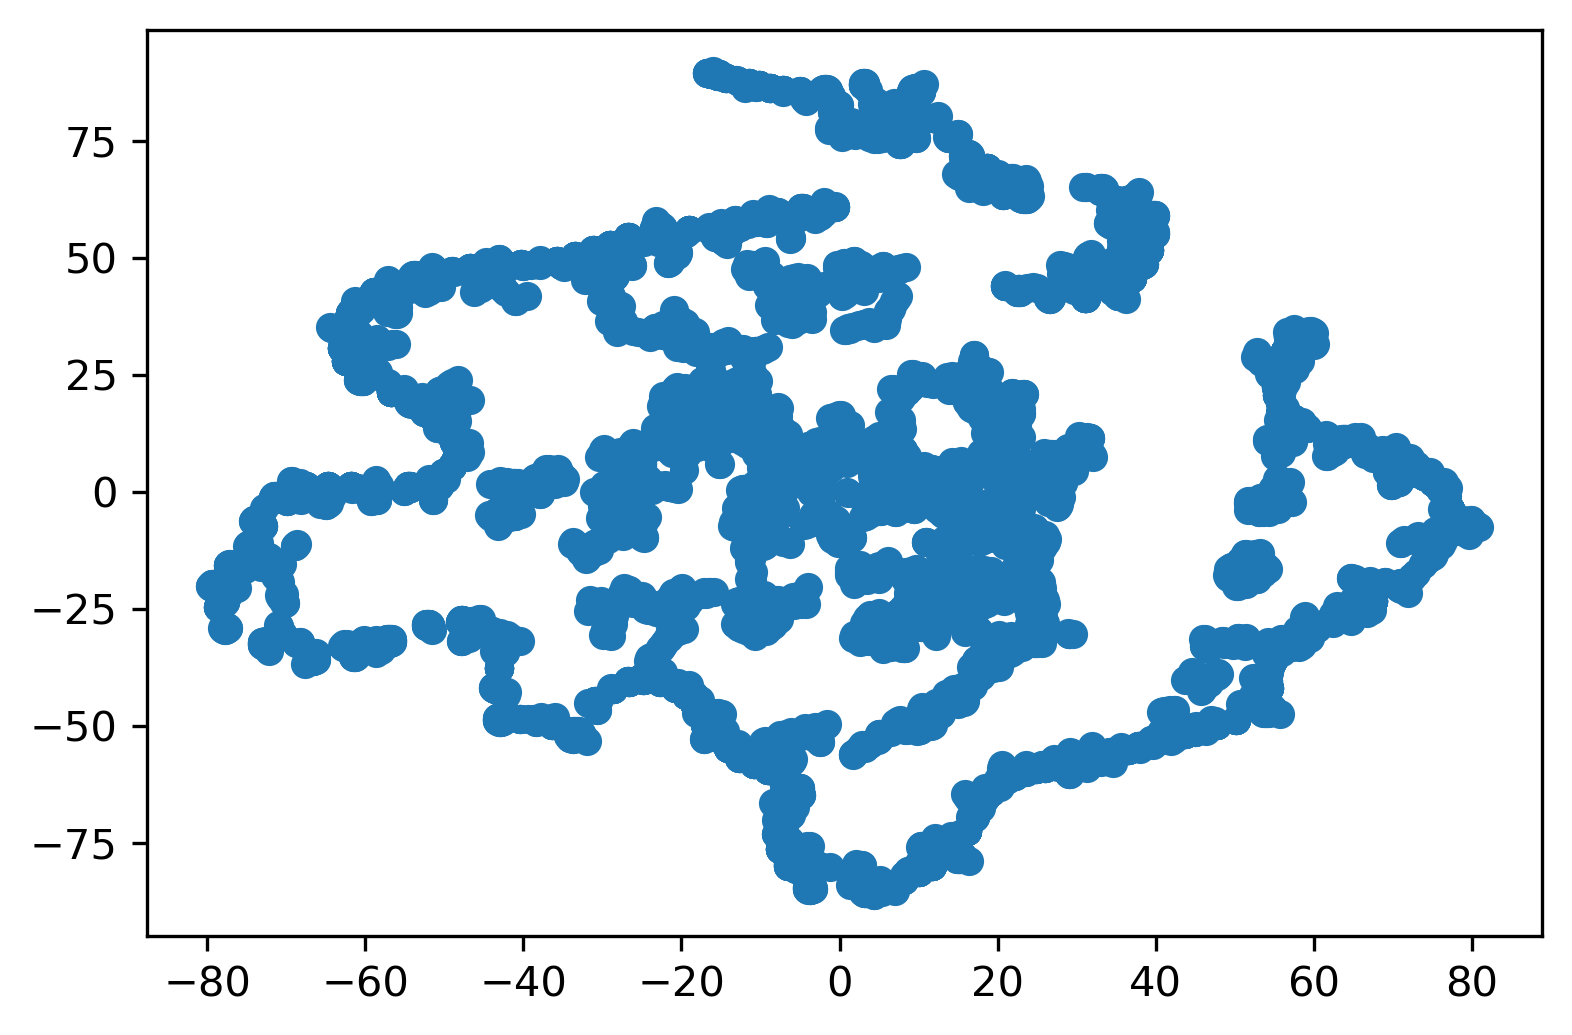

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(dpi=300)
plt.scatter(tsne[0],tsne[1])

# KMeans算法聚类

绘制CH指标图

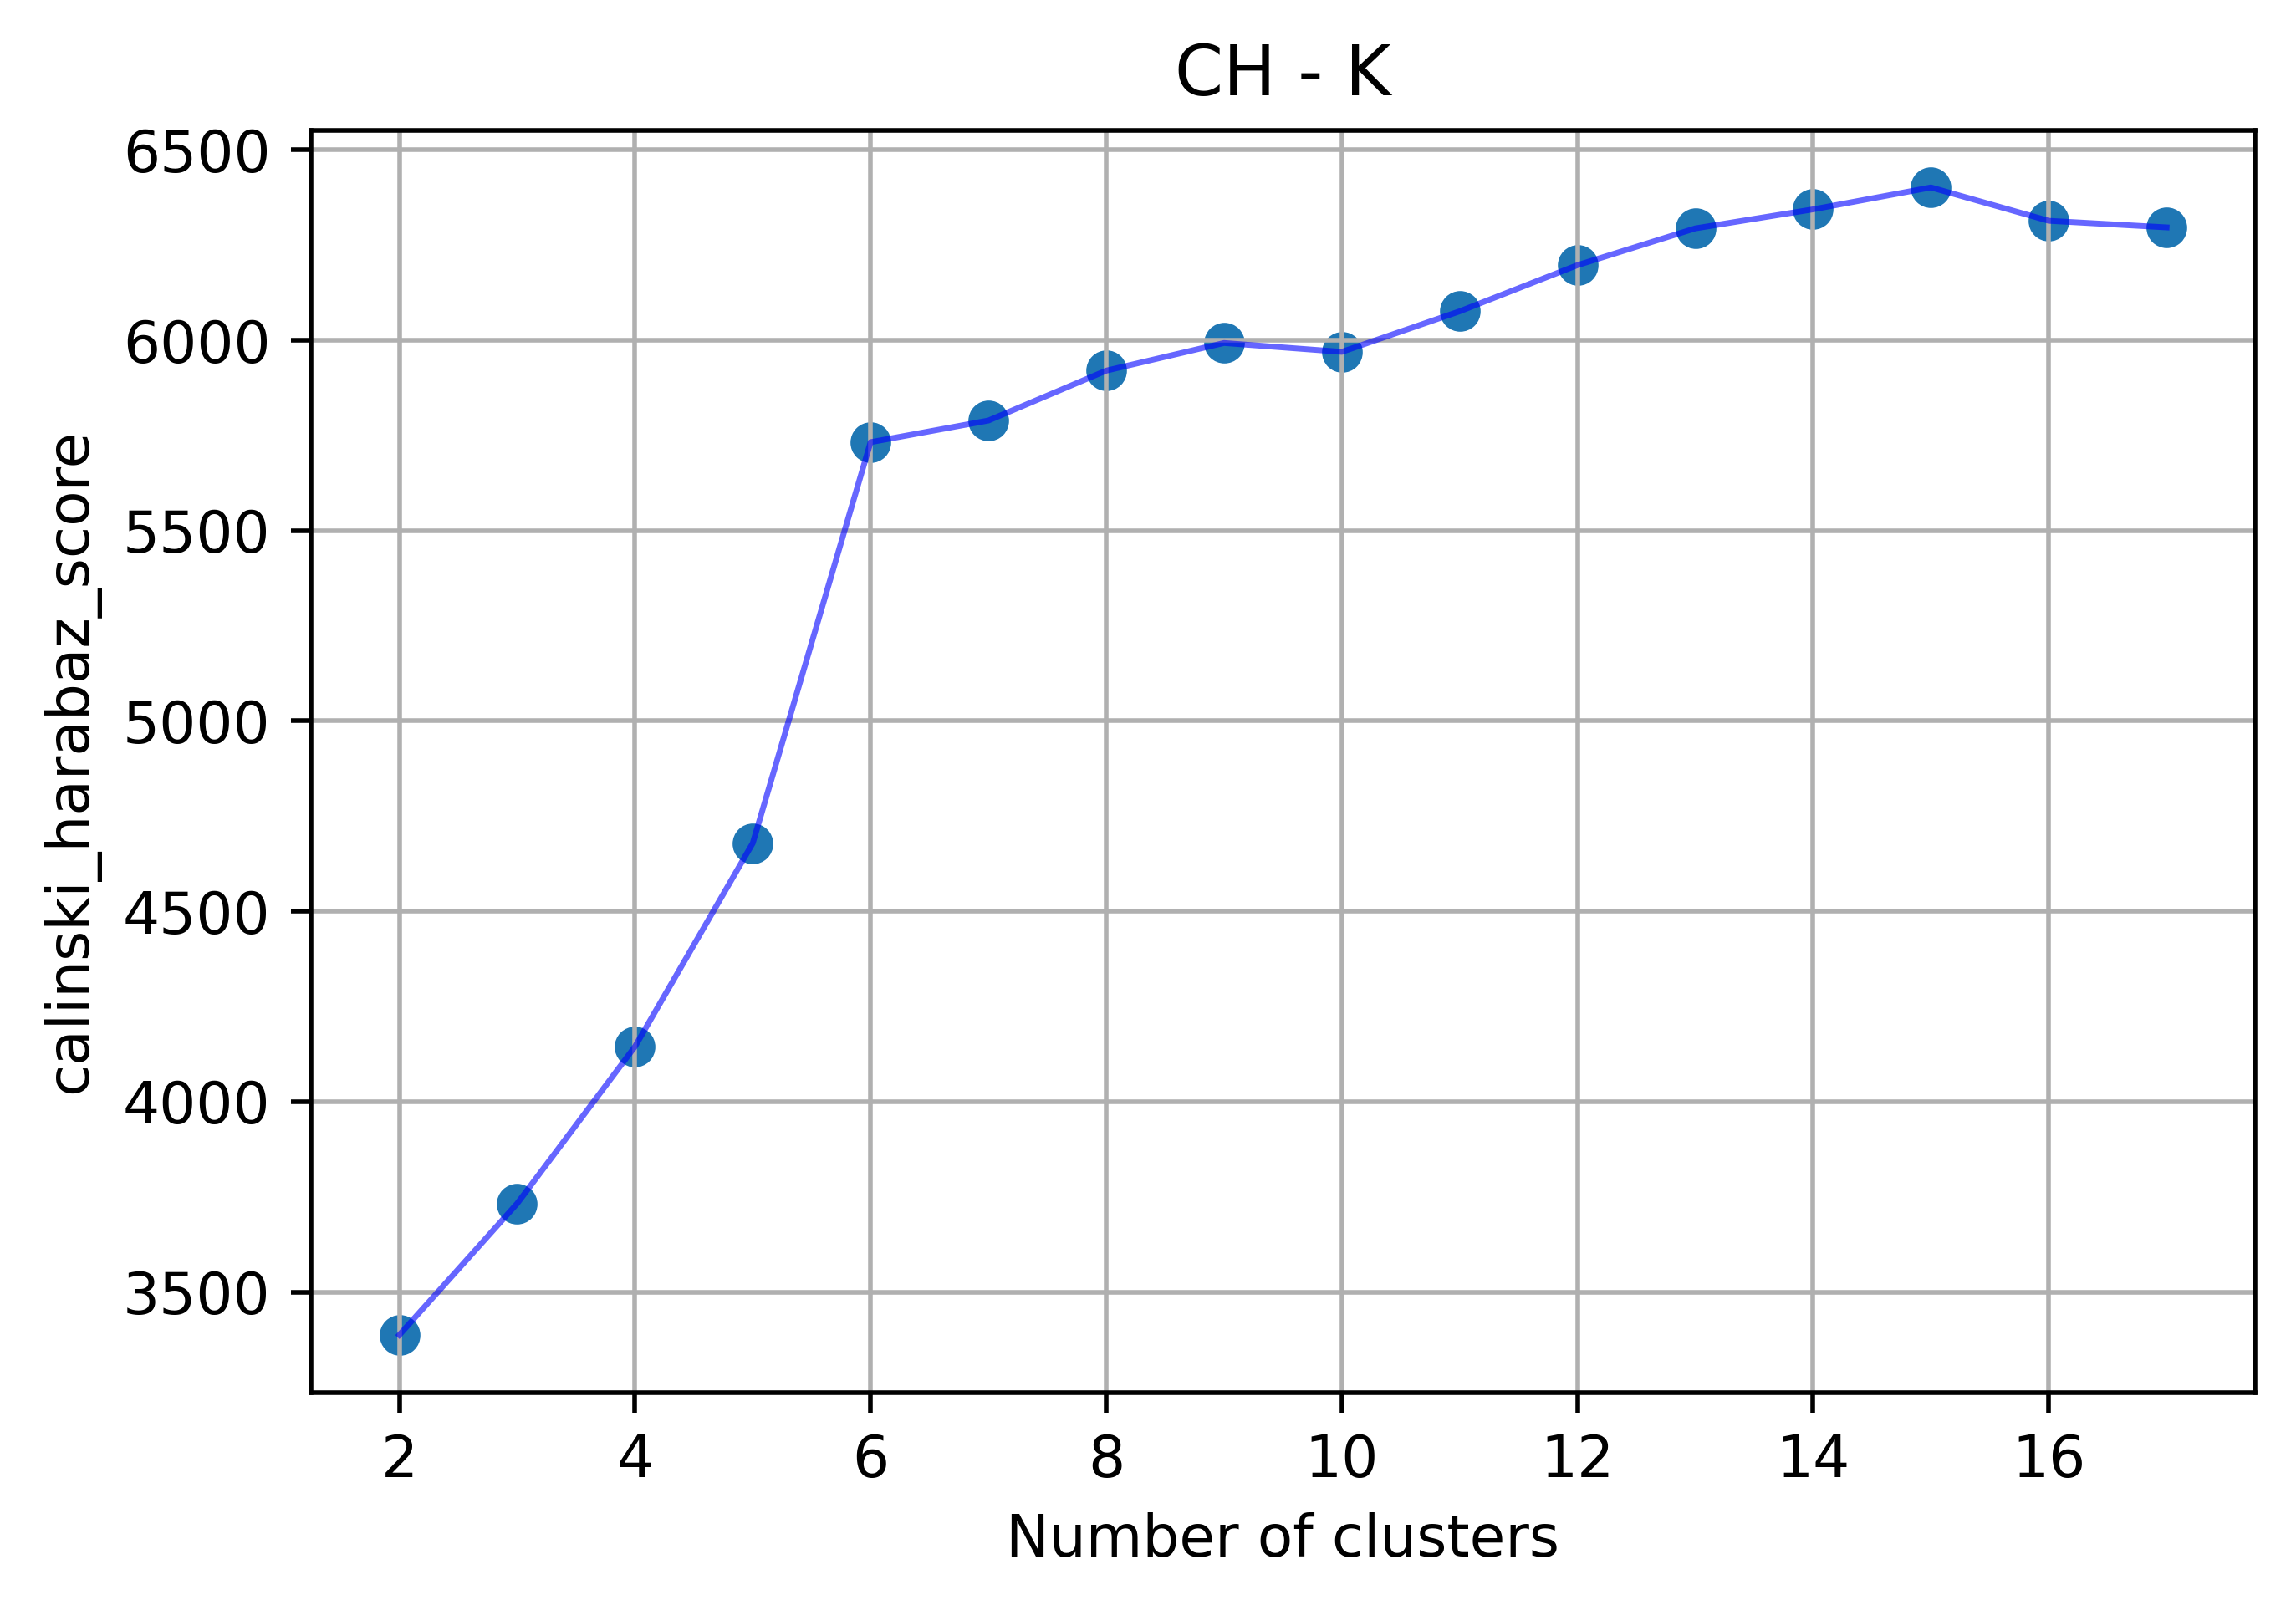

In [ ]:
%matplotlib inline
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
ch_scores=[]
for i in range(2,18):
    km=KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    km.fit(X)
    ch_scores.append(metrics.calinski_harabasz_score(X,km.labels_))
plt.figure(dpi=500)
plt.plot(range(2,18),ch_scores,color='b', linewidth=1, alpha=0.6)
plt.scatter(range(2,18),ch_scores)
plt.grid(True)
plt.title('CH - K')
plt.xlabel('Number of clusters')
plt.ylabel('calinski_harabaz_score')
plt.show()

CH index的数值越大越好。

在真实的分群label不知道的情况下，可以作为评估模型的一个指标。 同时，数值越小可以理解为：组间协方差很小，组与组之间界限不明显。 与轮廓系数的对比，笔者觉得最大的优势：快！相差几百倍！毫秒级，

优缺点总结：

优点:当 cluster （簇）密集且分离较好时，分数更高，这与一个标准的 cluster（簇）有关。得分计算很快.
缺点:凸的簇的 Calinski-Harabaz index（Calinski-Harabaz 指数）通常高于其他类型的 cluster（簇），例如通过 DBSCAN 获得的基于密度的 cluster（簇）。

在sklearn中的接口：
在scikit-learn中， Calinski-Harabasz Index对应的方法是metrics.calinski_harabaz_score. 它的定义如下：
def calinski_harabasz_score(X, labels):
'''
X：表示要聚类的样本数据，一般形如（samples，features）的格式
labels：即聚类之后得到的label标签，形如（samples，）的格式
'''

In [ ]:
from sklearn.cluster import KMeans
estimator=KMeans(n_clusters=6,init='k-means++',n_init=10,max_iter=300,random_state=0)#构造聚类器
estimator.fit(X)
label_pred=estimator.labels_#聚类标签
df['label']=label_pred
df['label'].value_counts()

1    1902
0    1816
4    1123
3    1062
5      25
2       3
Name: label, dtype: int64

In [ ]:
#该算法的CH指标值
from sklearn import metrics
print(metrics.calinski_harabasz_score(X,label_pred))

5732.518656970026


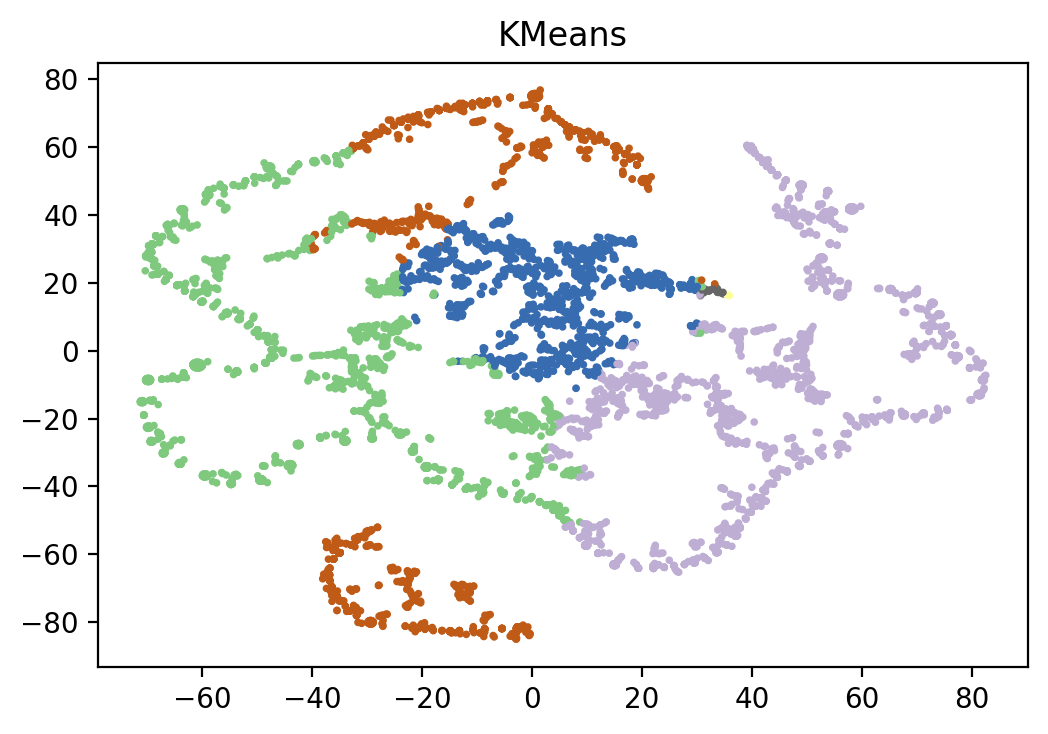

In [ ]:
from sklearn.manifold import TSNE
#colors=['c','b','g','r','m','y']
tsne=TSNE()
tsne.fit_transform(X)#进行数据降维度，降成两维
tsne=pd.DataFrame(tsne.embedding_,index=df[['post_count','reply_count','first_now','last_now','post_quality']].index)
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(dpi=200)
plt.title('KMeans')#标题
plt.scatter(tsne[0],tsne[1],s=3,c=label_pred,cmap='Accent')

# DBSCAN聚类

In [ ]:
#获得K距离
from sklearn.neighbors import NearestNeighbors
nbrs=NearestNeighbors()
NBRS=nbrs.fit(X)
distance, index=nbrs.kneighbors(X)

Text(0, 0.5, 'Epsilon')

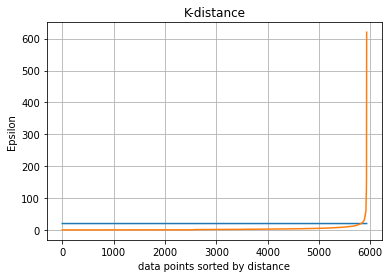

In [ ]:
#绘制K-distance图并找到epsilon值,为20左右（结果存疑，感觉不靠谱）
dis=np.sort(distance,axis=0)
dis1=dis[:,1]
dis2=[20 for i in range(len(dis1))]
plt.figure(500)
plt.grid()#网格线
plt.plot(dis2)
plt.plot(dis1)
plt.title("K-distance")
plt.xlabel("data points sorted by distance")
plt.ylabel("Epsilon")

In [ ]:
#尝试找到曲率最大的点
dbscan1=DBSCAN(eps=37,min_samples=4)
dbscan1.fit(X)
metrics.calinski_harabasz_score(X,dbscan1.labels_)

832.1779342680081

In [ ]:
df['dbscan']=dbscan1.labels_
df['dbscan'].value_counts()

 0    5871
-1      60
Name: dbscan, dtype: int64

In [ ]:
#验证用下面方法做出来的结果很差
dbscan=DBSCAN(eps=0.5,min_samples=5)
dbscan.fit(X)
print(metrics.calinski_harabasz_score(X,dbscan.labels_))
d1=pd.DataFrame(columns=['label'])
d1['label']=dbscan.labels_
print(d1['label'].value_counts())
del d1

11.699523294664555
-1      3797
 41       38
 54       35
 70       31
 81       30
        ... 
 13        5
 107       5
 120       5
 176       5
 175       5
Name: label, Length: 180, dtype: int64


In [ ]:
#废案
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
res=[]
for eps in np.arange(0.001,1,0.05):
    for min_samples in range(2,10):
          dbscan=DBSCAN(eps=eps,min_samples=min_samples)
          dbscan.fit(X)#模型拟合
          n_clusters=len([i for i in set(dbscan.labels_) if i !=-1])#统计各参数组合下聚类的个数
          outliners=np.sum(np.where(dbscan.labels_==-1,1,0))#异常点的个数
          stats=str(pd.Series([i for i in dbscan.labels_ if i!=-1]).value_counts().values)
          ch_scores_dbscan=metrics.calinski_harabasz_score(X,dbscan.labels_)
          res.append({'eps':eps,'min_samples':min_samples,'n_clusters':n_clusters,'outliners':outliners,'ch_score':ch_scores_dbscan})
dd=pd.DataFrame(res)
#dd.to_csv('ch_scores_dbscan.csv',index=0)
dd

,eps,min_samples,n_clusters,outliners,ch_score
0,0.001,2,331,3409,8.283044
1,0.001,3,239,3593,10.244484
2,0.001,4,203,3701,11.124366
3,0.001,5,179,3797,11.699523
4,0.001,6,156,3912,11.981307
...,...,...,...,...,...
155,0.951,5,179,3797,11.699523
156,0.951,6,156,3912,11.981307
157,0.951,7,142,3996,12.492175
158,0.951,8,132,4066,12.506841


# 层次分析聚类

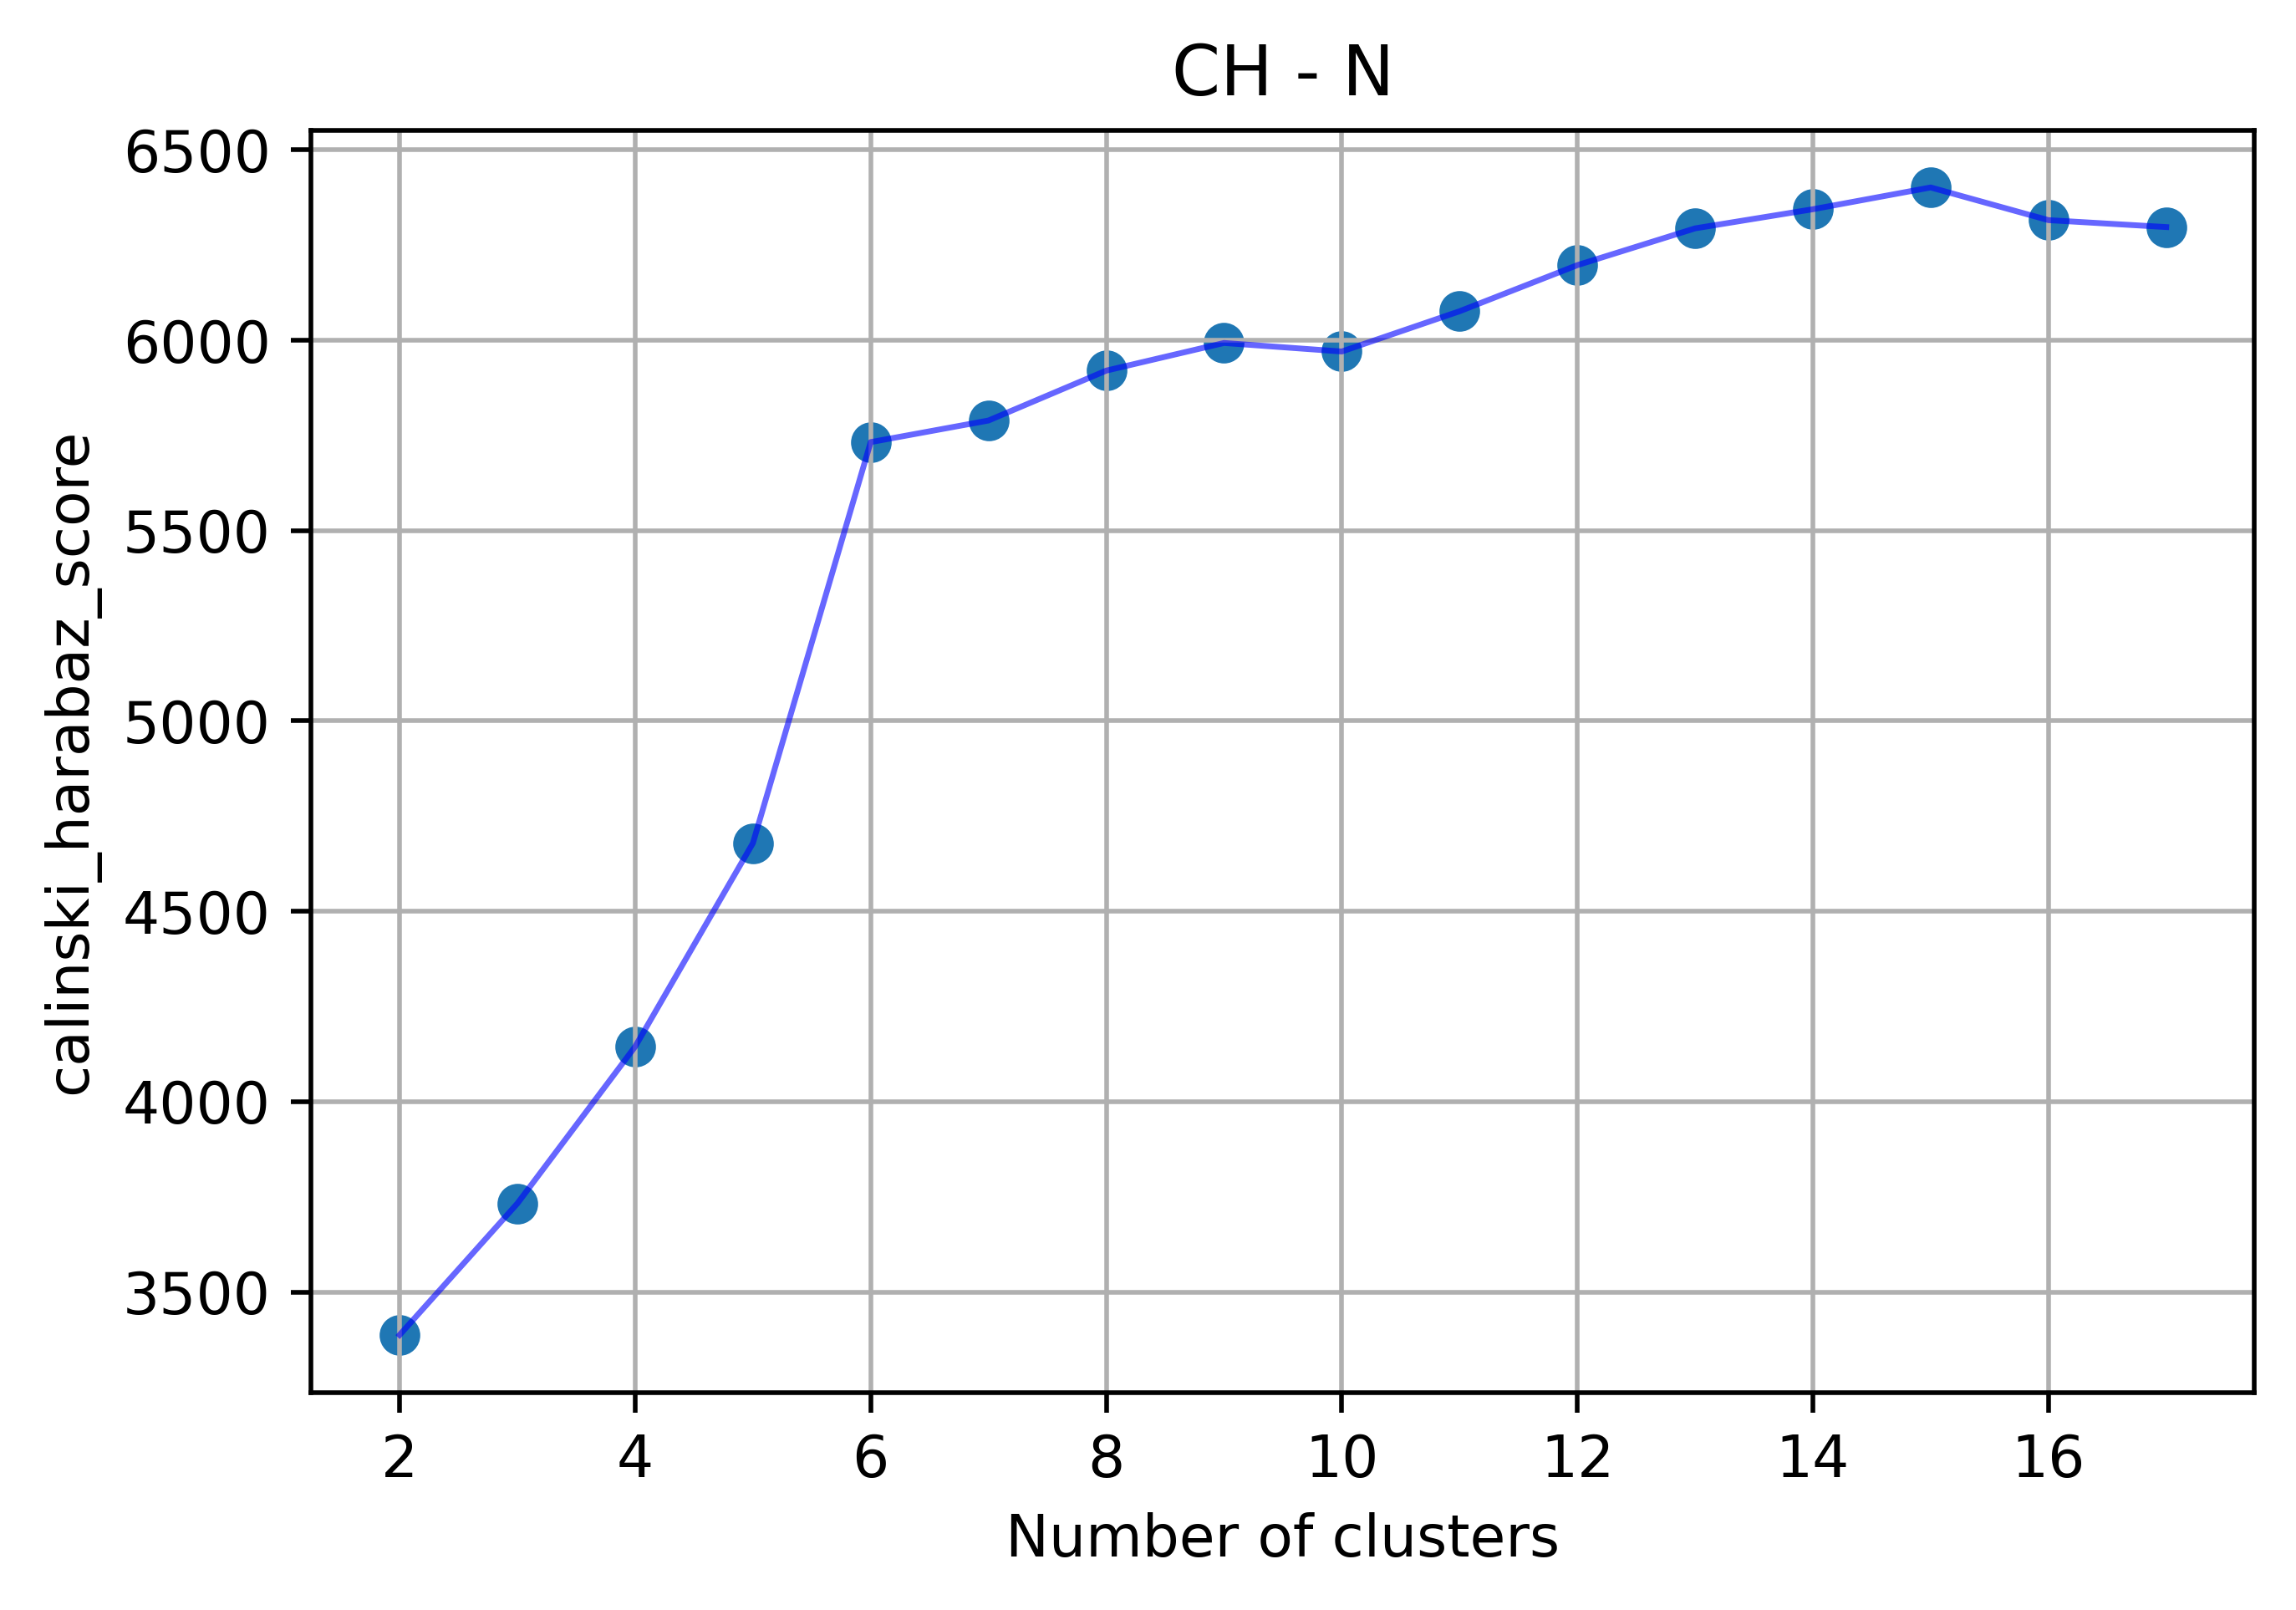

In [ ]:
#绘制CH指标变化图
%matplotlib inline
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
ch_scores=[]
for i in range(2,18):    
    km=KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)    
    km.fit(X)    
    ch_scores.append(metrics.calinski_harabasz_score(X,km.labels_))
plt.figure(dpi=500)
plt.plot(range(2,18),ch_scores,color='b', linewidth=1, alpha=0.6)
plt.scatter(range(2,18),ch_scores)
plt.grid(True)
plt.title('CH - N')
plt.xlabel('Number of clusters')
plt.ylabel('calinski_harabaz_score')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agg=AgglomerativeClustering(n_clusters=6,affinity='euclidean')
agg.fit(X)
df['agg']=agg.labels_
df['agg'].value_counts()

4    2084
0    1907
1     975
3     950
5      12
2       3
Name: agg, dtype: int64

In [ ]:
metrics.calinski_harabasz_score(X,agg.labels_)

4716.8556651863055